In [1]:
# Cell 1 — Imports, dataset generation (or load if already present), quick preview
import os
import numpy as np
import pandas as pd

# Reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# Path to dataset file (will load if exists, otherwise generate and save)
dataset_path = "cpu_scheduling_dataset.csv"

if os.path.exists(dataset_path):
    print(f"Loading existing dataset from {dataset_path}")
    df = pd.read_csv(dataset_path)
else:
    print("Generating synthetic CPU scheduling dataset...")
    samples = 2000
    rows = []
    for _ in range(samples):
        # Core process / CPU scheduling parameters
        num_processes = np.random.randint(3, 20)            # number of processes
        avg_burst_time = np.random.uniform(1.0, 15.0)      # average CPU burst time
        avg_arrival_time = np.random.uniform(0.0, 10.0)    # average arrival time
        avg_waiting_time = np.random.uniform(0.0, 20.0)    # average waiting time observed
        cpu_utilization = np.random.uniform(0.5, 1.0)      # CPU utilization fraction
        time_quantum = np.random.uniform(1.0, 10.0)        # time quantum (for RR)

        # Derived features (match style of your page-replacement features)
        burst_to_quantum = avg_burst_time / (time_quantum + 1e-8)
        waiting_to_arrival = avg_waiting_time / (avg_arrival_time + 1e-5)

        # Simple rule-based label to pick "best" scheduling algorithm
        if burst_to_quantum > 2.5 and avg_waiting_time > 10:
            best_algo = "FCFS"
        elif burst_to_quantum <= 2.5 and cpu_utilization > 0.8:
            best_algo = "SJF"
        else:
            best_algo = "RR"

        rows.append([
            num_processes, avg_burst_time, avg_arrival_time,
            avg_waiting_time, cpu_utilization, time_quantum,
            burst_to_quantum, waiting_to_arrival, best_algo
        ])

    df = pd.DataFrame(rows, columns=[
        "num_processes", "avg_burst_time", "avg_arrival_time",
        "avg_waiting_time", "cpu_utilization", "time_quantum",
        "burst_to_quantum", "waiting_to_arrival", "best_algo"
    ])

    # Save for reuse
    df.to_csv(dataset_path, index=False)
    print(f"Saved generated dataset to {dataset_path}")

# Quick preview (head and basic stats)
print("\nDataset shape:", df.shape)
display(df.head())
display(df.describe(include='all'))


Loading existing dataset from cpu_scheduling_dataset.csv

Dataset shape: (2000, 9)


,num_processes,avg_burst_time,avg_arrival_time,avg_waiting_time,cpu_utilization,time_quantum,burst_to_quantum,waiting_to_arrival,best_algo
0,9,12.151602,1.834348,15.593820,0.798425,5.012495,2.424262,8.500969,RR
1,13,7.429484,3.337086,2.857336,0.825444,1.507704,4.927680,0.856234,RR
2,14,14.139738,0.007788,19.844231,0.808741,6.504878,2.173713,2544.896191,SJF
3,14,1.322874,5.247747,7.997219,0.523333,9.763800,0.135488,1.523931,RR
4,17,7.384980,7.851760,3.993476,0.757117,6.331731,1.166345,0.508608,RR


,num_processes,avg_burst_time,avg_arrival_time,avg_waiting_time,cpu_utilization,time_quantum,burst_to_quantum,waiting_to_arrival,best_algo
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RR
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1182
mean,11.086500,8.025575,5.015105,10.291184,0.743378,5.515497,2.073902,9.996906,NaN
std,4.898981,4.081330,2.903091,5.722755,0.143761,2.581922,2.069082,96.527740,NaN
min,3.000000,1.003179,0.006275,0.024637,0.500006,1.002168,0.105900,0.005331,NaN
25%,7.000000,4.515310,2.528139,5.532919,0.618771,3.357407,0.785025,1.067783,NaN
50%,11.000000,8.016210,5.003466,10.377260,0.738394,5.570725,1.427169,2.016673,NaN
75%,15.000000,11.599380,7.549345,15.249523,0.863758,7.686150,2.536476,4.181723,NaN


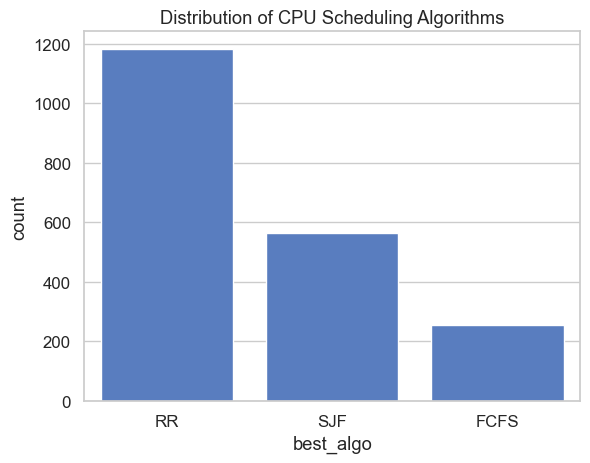

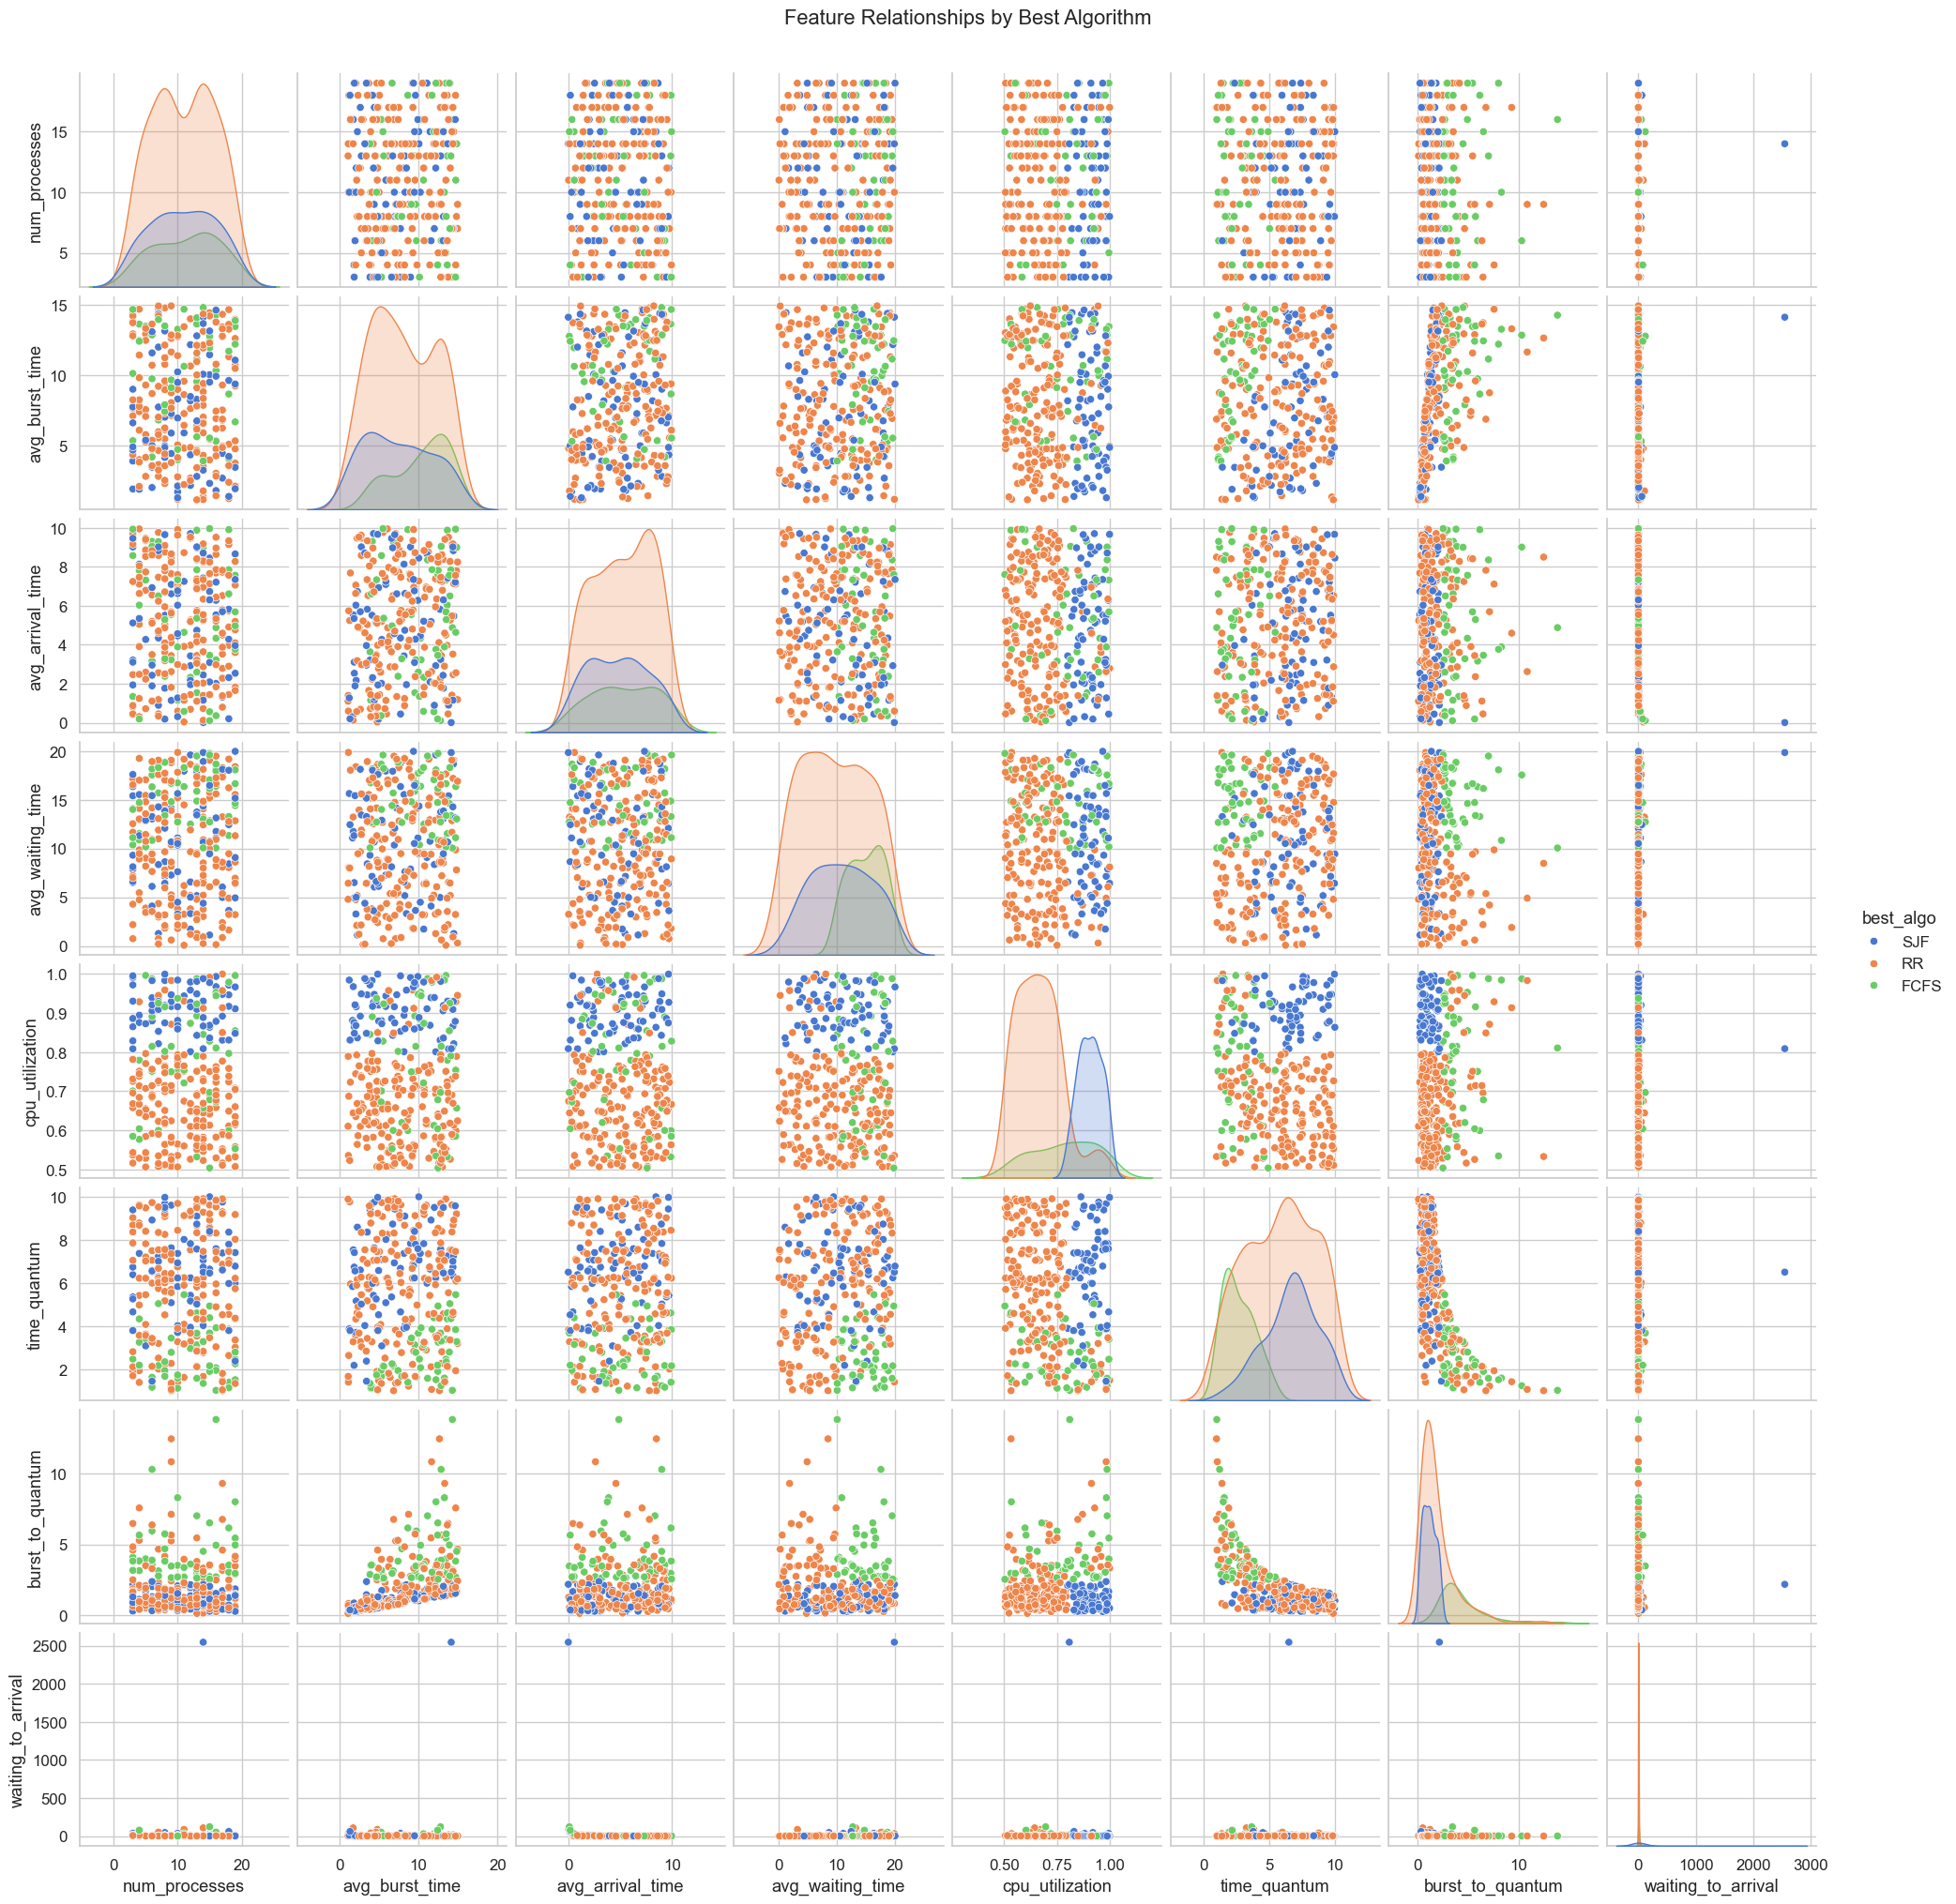

In [3]:
# Cell 2 — Basic Visualization (same style as page replacement)
import seaborn as sns
import matplotlib.pyplot as plt

# Show class distribution
sns.countplot(x="best_algo", data=df)
plt.title("Distribution of CPU Scheduling Algorithms")
plt.show()

# Pairplot to see feature relationships by algorithm
sns.pairplot(df.sample(300), hue="best_algo", diag_kind="kde")
plt.suptitle("Feature Relationships by Best Algorithm", y=1.02)
plt.show()


In [4]:
# Cell 3 — Preprocessing (Encoding, Scaling, Train/Test Split)
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Feature and target columns
features = [
    "num_processes", "avg_burst_time", "avg_arrival_time",
    "avg_waiting_time", "cpu_utilization", "time_quantum",
    "burst_to_quantum", "waiting_to_arrival"
]
target = "best_algo"

# Encode target labels (FCFS, SJF, RR)
le = LabelEncoder()
df[target] = le.fit_transform(df[target])

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])
y = df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("✅ Preprocessing complete.")
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


✅ Preprocessing complete.
Training samples: 1600
Testing samples: 400


In [6]:
# Cell 4 — Model Training and Accuracy Comparison (Logistic Regression + Random Forest only)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize models
log_reg = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(random_state=42)

# Train models
log_reg.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Evaluate
y_pred_log = log_reg.predict(X_test)
y_pred_rf = rf.predict(X_test)

acc_log = accuracy_score(y_test, y_pred_log)
acc_rf = accuracy_score(y_test, y_pred_rf)

print("Logistic Regression Accuracy:", round(acc_log, 4))
print("Random Forest Accuracy:", round(acc_rf, 4))

# Choose best model
if acc_rf >= acc_log:
    best_model = rf
    best_model_name = "Random Forest"
    best_accuracy = acc_rf
else:
    best_model = log_reg
    best_model_name = "Logistic Regression"
    best_accuracy = acc_log

print("\n✅ Best Model:", best_model_name)
print("Accuracy:", round(best_accuracy, 4))


Logistic Regression Accuracy: 0.915
Random Forest Accuracy: 0.9975

✅ Best Model: Random Forest
Accuracy: 0.9975


In [7]:
# Cell 5 — Saving Model, Encoder, and Scaler
import joblib

# Save the best model
joblib.dump(best_model, "best_cpu_scheduling_model.pkl")

# Save the label encoder
joblib.dump(le, "label_encoder_cpu.pkl")

# Save the scaler
joblib.dump(scaler, "scaler_cpu.pkl")

print("✅ All model components saved successfully:")
print("- best_cpu_scheduling_model.pkl")
print("- label_encoder_cpu.pkl")
print("- scaler_cpu.pkl")


✅ All model components saved successfully:
- best_cpu_scheduling_model.pkl
- label_encoder_cpu.pkl
- scaler_cpu.pkl


In [9]:
# Cell 6 — Model Loading and Making a Single Prediction
import joblib
import pandas as pd

# Load saved model components
model = joblib.load("best_cpu_scheduling_model.pkl")
le = joblib.load("label_encoder_cpu.pkl")
scaler = joblib.load("scaler_cpu.pkl")

# Define features (same order used during training)
features = [
    "num_processes", "avg_burst_time", "avg_arrival_time",
    "avg_waiting_time", "cpu_utilization", "time_quantum",
    "burst_to_quantum", "waiting_to_arrival"
]

# Example input values (you can change these to test different scenarios)
num_processes = 10
avg_burst_time = 7.5
avg_arrival_time = 3.2
avg_waiting_time = 8.0
cpu_utilization = 0.78
time_quantum = 4.0

# Derived features (must match how we created them during dataset generation)
burst_to_quantum = avg_burst_time / (time_quantum + 1e-8)
waiting_to_arrival = avg_waiting_time / (avg_arrival_time + 1e-5)

# Create DataFrame for input
df_input = pd.DataFrame([[
    num_processes, avg_burst_time, avg_arrival_time,
    avg_waiting_time, cpu_utilization, time_quantum,
    burst_to_quantum, waiting_to_arrival
]], columns=features)

# Scale input using the saved scaler
scaled_input = scaler.transform(df_input)

# Predict using the trained model
prediction = model.predict(scaled_input)
predicted_algo = le.inverse_transform(prediction)[0]

algo_full_names = {
    "FCFS": "First Come First Serve (FCFS)",
    "SJF": "Shortest Job First (SJF)",
    "RR": "Round Robin (RR)"
}

print("🧠 Predicted Best CPU Scheduling Algorithm:",algo_full_names[predicted_algo])


🧠 Predicted Best CPU Scheduling Algorithm: Round Robin (RR)
